In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, get_scorer

In [50]:
df = pd.read_csv(r"..\oblig3\student_performance.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [29]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [30]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [31]:
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Beskrivelse av dataset:
Datasettet består av 36 features/kolonner og en target/kolonne. Alle featurene er oppgitt i numeriske verdier, men flere har disse ser ut til å ha blitt transformert fra categoriske verdier/input og er ikke en del av en sammenhengende tallrekke. Hensikten med datasettet er å predikere akademisk frafall og si noe om hvilke features som påvirker dette. Hver rad i datasette representere en student.

- Feature kolonnene inneholder forskjellig informasjon om akademsike, demografiske og sosial økonomiske faktorer som var kjent ved oppstart.

- Target kolonnen oppgir 3 kategoriske verdier, Enrolled, Droppout og Graduated. Disse beskriver statusen studenten har ved avsluttning av normal vargihet for et fag.

- Datasette skal ikke inneholde noen manglende verdier.

- Det står også i beskrivelsen av datasette at det har blitt gjennomført en begtydelig preprossesering av datasettet for eventuelle uteliggere og manglende data.

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


<Axes: xlabel='Target'>

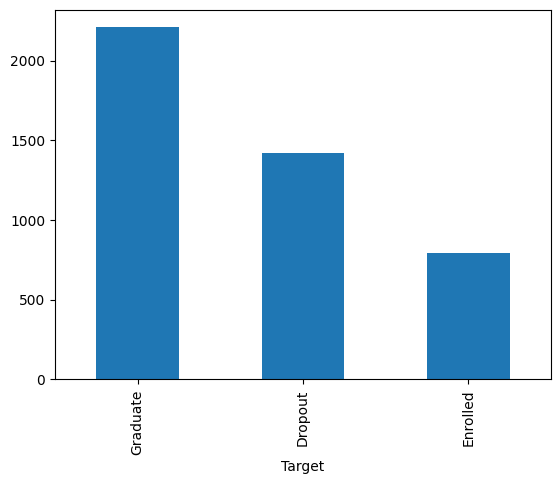

In [62]:
print(df['Target'].value_counts())
df['Target'].value_counts().plot.bar()

- Som vi ser av tellingen av kategoriene i target kolonnen, så er det noe skjevfordeling i antallet av de forskjellige kategoriene, men alle kategoriene er godt representert og ingen av katagoriene har et veldig lavt antall representasjoner.

In [86]:
df_targets = pd.Series(LabelEncoder().fit_transform(df['Target']))

- Siden target kollonnen i utgangspunktet inneholdeholder categoriskeverdier så må vi transformere disse før vi bruker datasette videre.

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


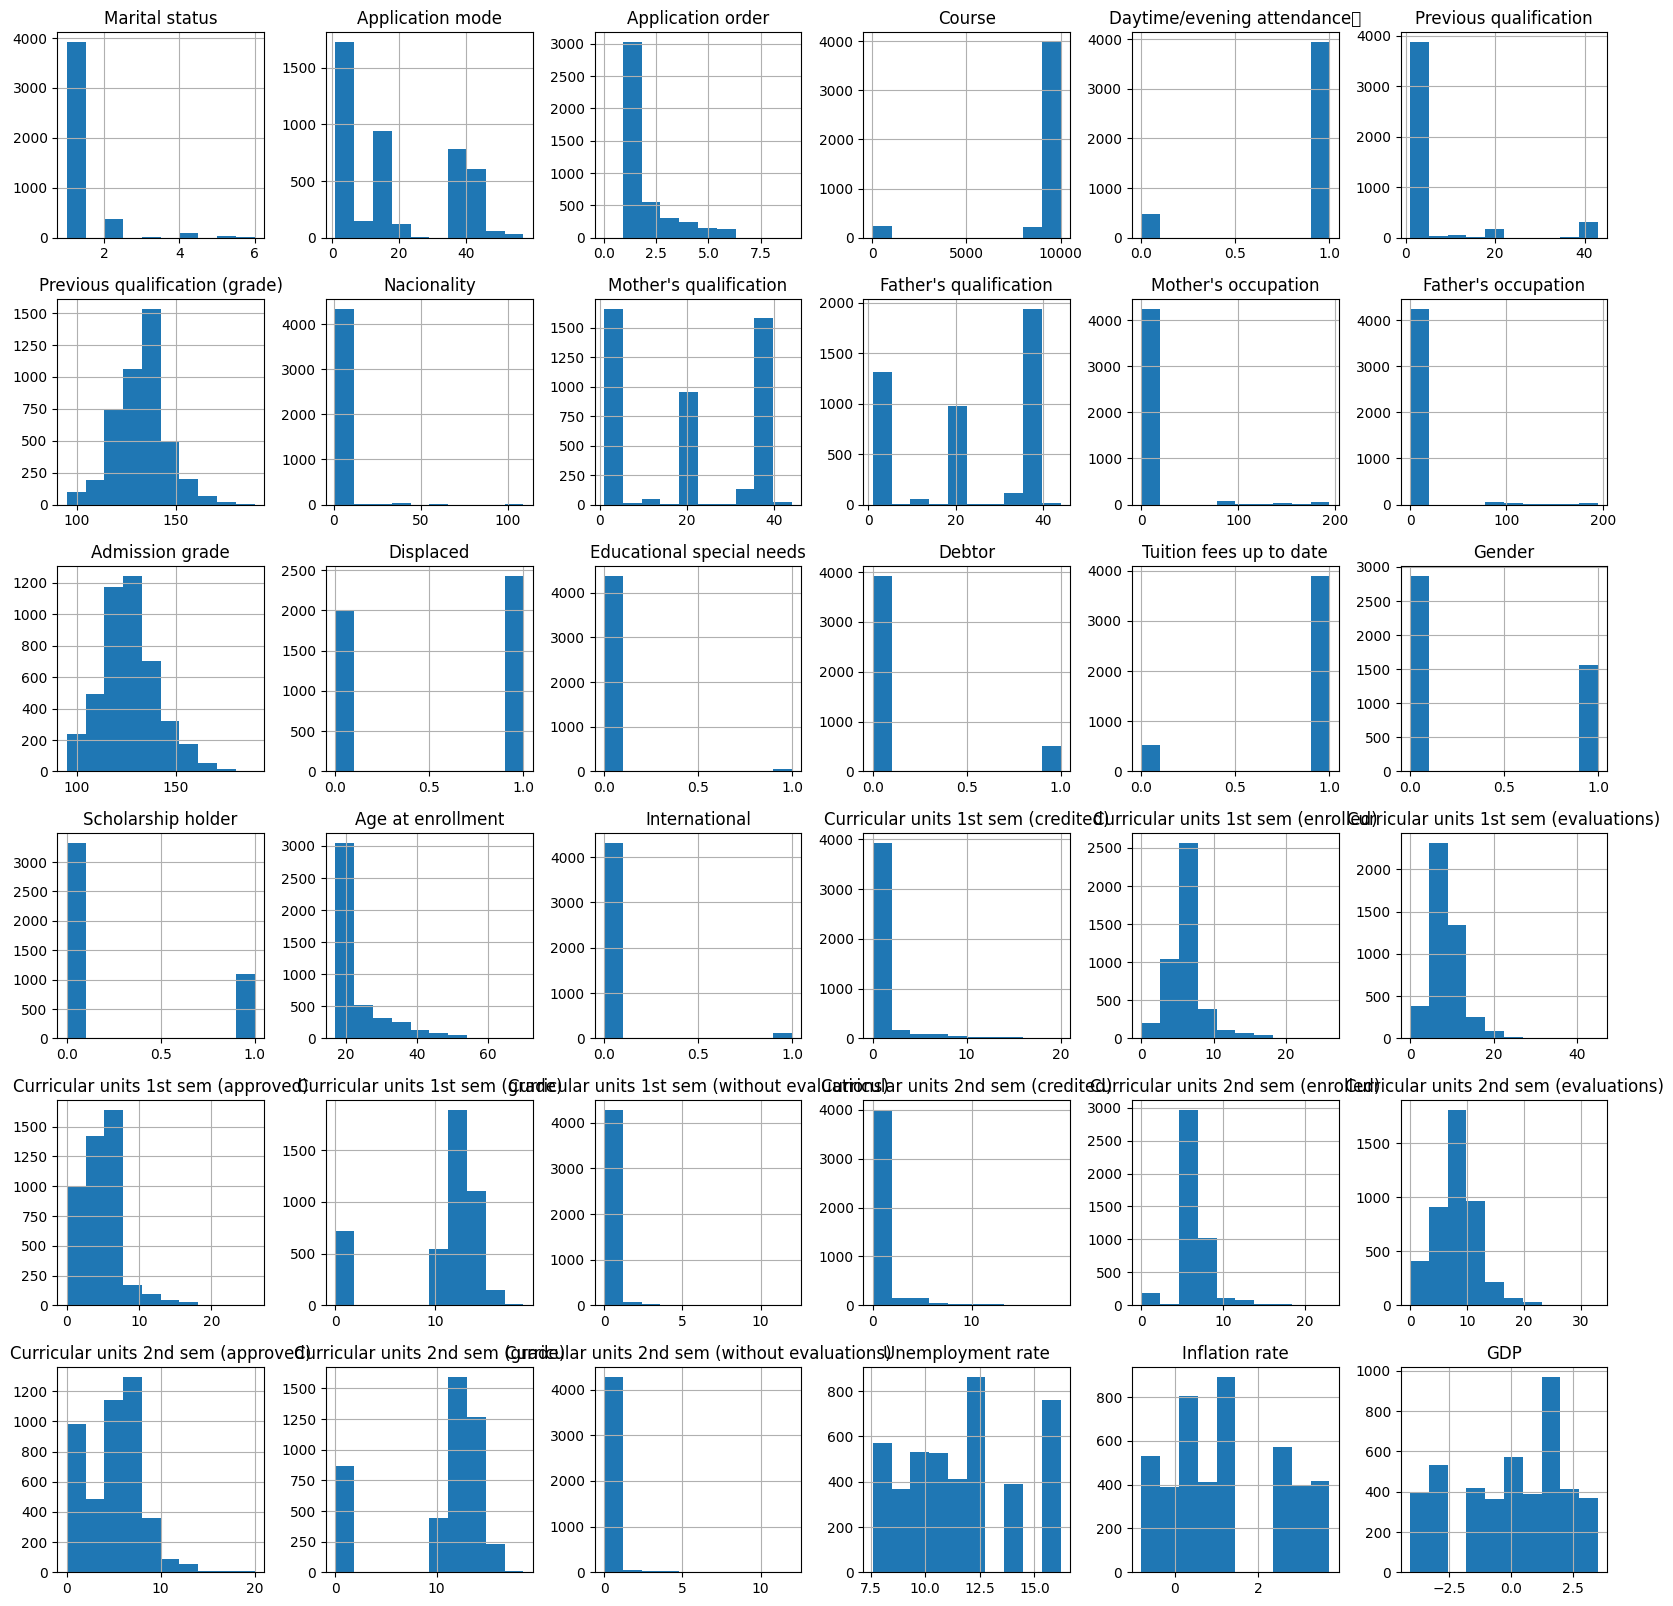

In [ ]:
df_features = df.drop("Target", axis=1)
df_features.hist(figsize=(20,20))
plt.show()

#### Histogram av feature kolonnene.
- Histogrammet viser at det er betydelig forskjell i skalaene til de forskjellige featurene og det vil derfor være hensiktsmessig å gjennomføre en scalering slik at disse er repsresetert innenfor samme scalering. Jeg kommer til å bruke en standard mean scalering til å gjennomføre dette.

- Vi ser også at datasettet inneholder en kobinasjon av kolonner med kontinuelige tallrekker og transformerte kategoriske data. Vi ser også at mange av kolonnen inneholder data som ikke er normalfordelt, men det er i utgangspunkt vansklig å gjøre noe med dette ut i fra sammensettning av datasetet uten å potensielt miste mye informasjon, det vil derfor være hensiksmessig å bruke modeller som ikke er avhenig av normalfordelete data for å prestere bra. 

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


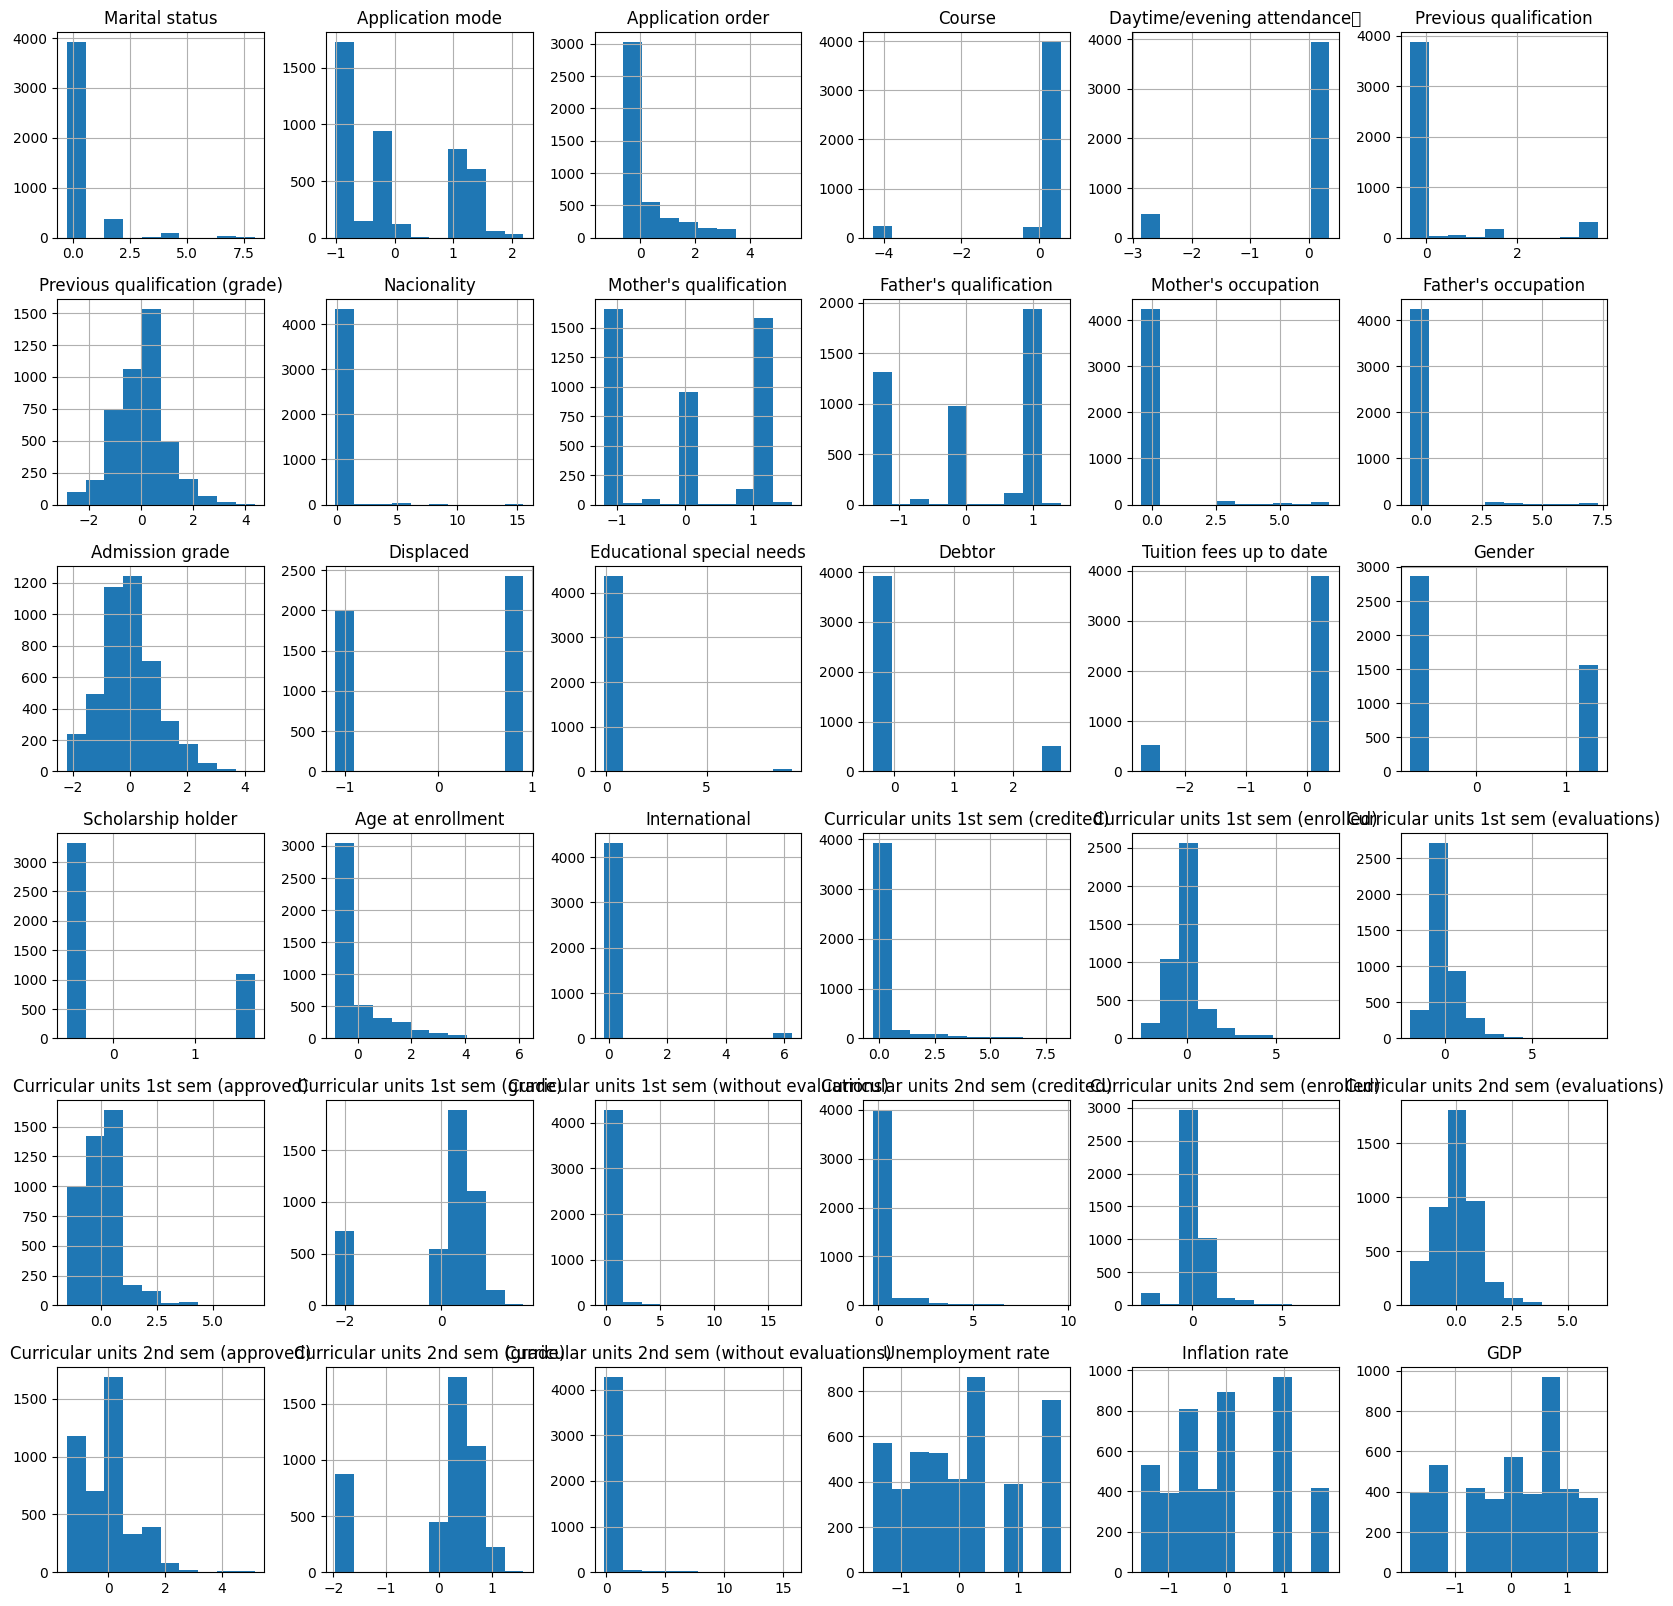

In [87]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df_features), columns=df_features.columns)
df_features.hist(figsize=(20,20))
plt.show()

In [80]:
df_enrolled = df[df['Target'] == 'Enrolled']
df_dropout = df[df['Target'] == 'Dropout'].sample(len(df_enrolled))
df_graduate = df[df['Target'] == 'Graduate'].sample(len(df_enrolled))

df_downsample = pd.concat([df_enrolled, df_dropout, df_graduate])
df_downsample = df_downsample.sample(frac=1)

df_downsample_features = pd.DataFrame(StandardScaler().fit_transform(df_downsample.drop('Target', axis=1)), columns=df_downsample.drop('Target', axis=1).columns)
df_downsample_target = pd.Series(LabelEncoder().fit_transform(df_downsample['Target']))

1    794
2    794
0    794
Name: count, dtype: int64


<Axes: >

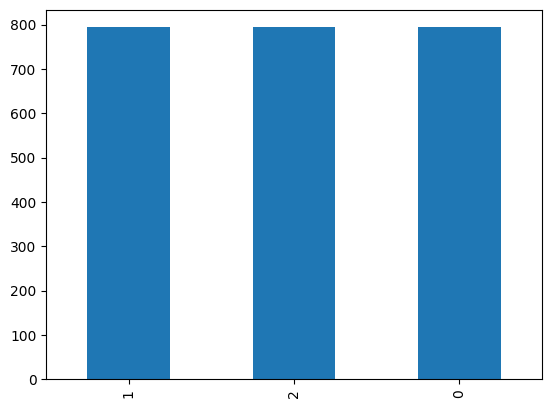

In [81]:
print(df_downsample_target.value_counts())
df_downsample_target.value_counts().plot.bar()

In [82]:
print(cross_val_score(RandomForestClassifier(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(RandomForestClassifier(), X=df_features, y=df_targets))

[0.68343816 0.75681342 0.69327731 0.68277311 0.70798319]
[0.76045198 0.77966102 0.77853107 0.77288136 0.76470588]


In [83]:
print(cross_val_score(GradientBoostingClassifier(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(GradientBoostingClassifier(), X=df_features, y=df_targets))

[0.70020964 0.72955975 0.72058824 0.69537815 0.72268908]
[0.76610169 0.78079096 0.78870056 0.78531073 0.76923077]


In [84]:
print(cross_val_score(LogisticRegression(), X=df_downsample_features, y=df_downsample_target))
print(cross_val_score(LogisticRegression(), X=df_features, y=df_targets))

[0.7148847  0.70440252 0.69957983 0.70798319 0.68907563]
[0.77514124 0.76271186 0.77966102 0.76384181 0.75      ]


#### Test av downsampling
- Selvom alle kategoriene i target kolonnen har en god representasjon av verdier, så har jeg valg å gjennomføre en test av downsampling på datasettet for å se om dette kan gi noen positiv påvirking på treningen av datasettet.

- Som vi kan se av cellene over så ga det ingen positiv effekt med en downsampling som matchet den kategorien med ferrest verdier og jeg kommer derfor ikke til å brukke dette videre i treningen og testingen av datasettet.

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hallo\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


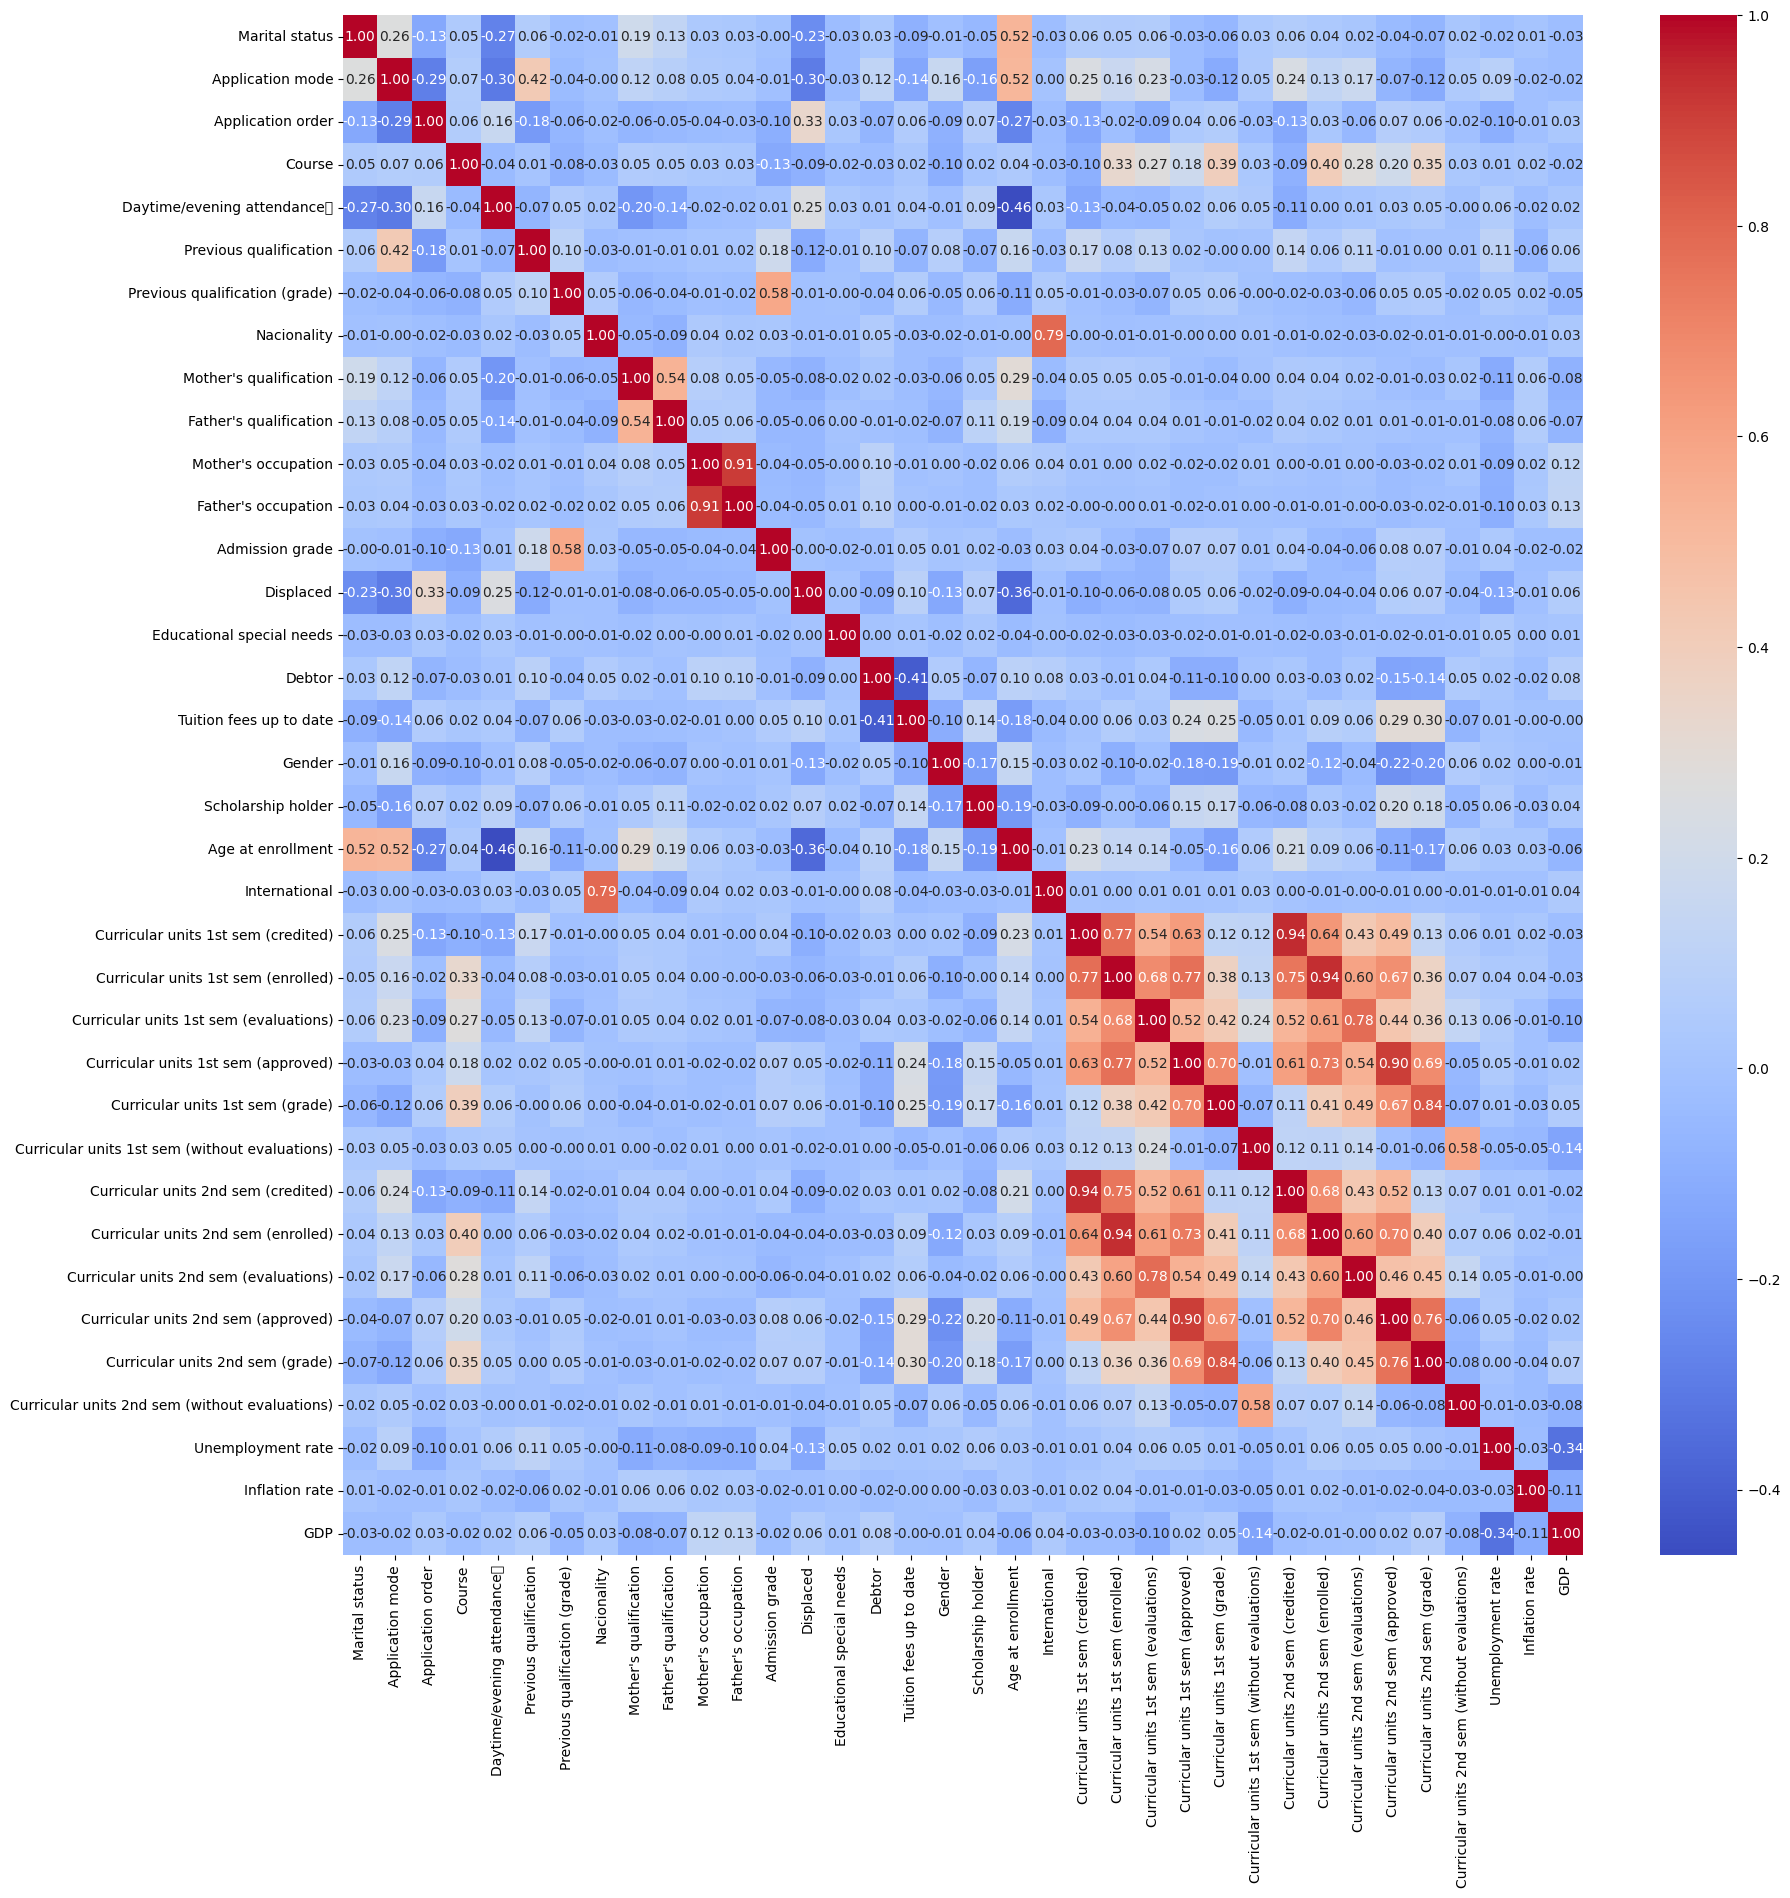

In [85]:
df_correlation = df_features.corr()
plt.figure(figsize=(20,20))
sb.heatmap(df_correlation, annot=True, cmap="coolwarm", fmt=".2f")

#### Korrelasjon
- Som vi kan se av plotet over er det noen features som har en betydelig korrelasjon, jeg kommer defor til bruke PCA til å teste om noen eller flere av featurene kan kombineres for å redusere denne korrelasjonen, samt gjøre datasettet mindre og mindre tidskrevende å trenem, tune og teste.

In [114]:
features_pca10 = pd.DataFrame(PCA(n_components=10).fit_transform(df_features))
features_pca14 = pd.DataFrame(PCA(n_components=14).fit_transform(df_features))
features_pca18 = pd.DataFrame(PCA(n_components=18).fit_transform(df_features))
features_pca22 = pd.DataFrame(PCA(n_components=22).fit_transform(df_features))
features_pca26 = pd.DataFrame(PCA(n_components=26).fit_transform(df_features))
features_pca29 = pd.DataFrame(PCA(n_components=29).fit_transform(df_features))
features_pca32 = pd.DataFrame(PCA(n_components=32).fit_transform(df_features))
features_pca35 = pd.DataFrame(PCA(n_components=35).fit_transform(df_features))

In [115]:
print(cross_val_score(RandomForestClassifier(), X=features_pca10, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca14, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca18, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca22, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca26, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca29, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca32, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=features_pca35, y=df_targets))
print(cross_val_score(RandomForestClassifier(), X=df_features, y=df_targets))


[0.72429379 0.7299435  0.73559322 0.72429379 0.71266968]
[0.73672316 0.73672316 0.73672316 0.73559322 0.72624434]
[0.73559322 0.74915254 0.73559322 0.72655367 0.72285068]
[0.73785311 0.75141243 0.75480226 0.72429379 0.72624434]
[0.74124294 0.75480226 0.75254237 0.72090395 0.72624434]
[0.75367232 0.7559322  0.75141243 0.74124294 0.72511312]
[0.75932203 0.7559322  0.75932203 0.7480226  0.73529412]
[0.74915254 0.74689266 0.75254237 0.74463277 0.7239819 ]
[0.76723164 0.7819209  0.78983051 0.76384181 0.75339367]


In [ ]:
"""print(cross_val_score(GradientBoostingClassifier(), X=features_pca10, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca14, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca18, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca22, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca26, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca29, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca32, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=features_pca35, y=df_targets))
print(cross_val_score(GradientBoostingClassifier(), X=df_features, y=df_targets))"""

[0.74463277 0.74463277 0.73898305 0.73898305 0.73529412]
[0.73898305 0.73898305 0.74463277 0.74350282 0.73190045]
[0.73898305 0.75367232 0.74576271 0.73898305 0.73303167]
[0.74350282 0.74350282 0.74237288 0.73672316 0.73642534]
[0.74463277 0.75819209 0.75141243 0.75480226 0.75      ]
[0.73785311 0.7559322  0.74350282 0.75254237 0.74773756]
[0.74463277 0.75706215 0.74576271 0.75819209 0.74886878]
[0.75367232 0.75819209 0.74237288 0.75706215 0.74660633]
[0.76497175 0.78079096 0.78870056 0.78531073 0.76923077]


In [116]:
print(cross_val_score(LogisticRegression(), X=features_pca10, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca14, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca18, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca22, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca26, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca29, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca32, y=df_targets))
print(cross_val_score(LogisticRegression(), X=features_pca35, y=df_targets))
print(cross_val_score(LogisticRegression(), X=df_features, y=df_targets))

[0.71525424 0.71073446 0.71638418 0.70734463 0.70022624]
[0.7299435  0.7299435  0.73333333 0.71751412 0.72850679]
[0.73559322 0.74576271 0.75819209 0.73333333 0.74660633]
[0.74576271 0.75254237 0.76158192 0.75254237 0.73190045]
[0.75706215 0.76610169 0.76384181 0.75480226 0.73190045]
[0.75819209 0.77288136 0.76158192 0.75819209 0.72963801]
[0.7819209  0.76723164 0.7819209  0.76045198 0.74773756]
[0.7740113  0.76384181 0.77966102 0.76158192 0.75      ]
[0.77514124 0.76271186 0.77966102 0.76384181 0.75      ]


In [54]:
global_random_state = 15

scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', average='macro', response_method='predict_proba')   
}

def evaluate(estimator, X, y):
    scores = {}
    for (name,scorer) in scoring.items():
        scores[name] = scorer(estimator, X, y) 
    return scores

def train(features, targets, estimator, params, scoring=scoring, refit='f1', random_state=global_random_state, outer_splits=5, inner_splits=4):

    outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=global_random_state)
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=global_random_state)

    scores_train = []
    scores_test = []
    estimators = []
    cv_results = []

    # Loop through all test folds
    for (train_index, test_index) in outer_cv.split(features, targets):
        
        grid = GridSearchCV(
            estimator,
            params, 
            scoring=scoring, 
            refit=refit,
            error_score='raise', 
            cv=inner_cv)
        grid.fit(features.iloc[train_index], targets.iloc[train_index])        
        
        evaluation_train = evaluate(grid, features.iloc[train_index], targets.iloc[train_index])
        evaluation_test = evaluate(grid, features.iloc[test_index], targets.iloc[test_index])
        
        scores_train.append(evaluation_train)
        scores_test.append(evaluation_test)
        
        estimators.append(grid.best_estimator_)
        cv_results.append(pd.DataFrame(grid.cv_results_))
        print("*")

    return estimators, pd.DataFrame(scores_train), pd.DataFrame(scores_test), pd.concat(cv_results, names=['test_split'], keys=range(outer_splits))

In [ ]:
rf_params = {
    'max_depth': [1,2], #10, 15 15,25,36
    'min_samples_split': [2,5,8], #5,6,7
    'criterion': ['gini'], #'entropy', 'log_loss'
    'n_estimators': [300] #100,
}
rf_estimators, rf_scores_train, rf_scores_test, rf_cv_results = train(df_features, df_targets,
    RandomForestClassifier(random_state=global_random_state),
    rf_params, outer_splits=3, inner_splits=2)

*
*
*


<Axes: xlabel='param_n_estimators', ylabel='mean_test_f1'>

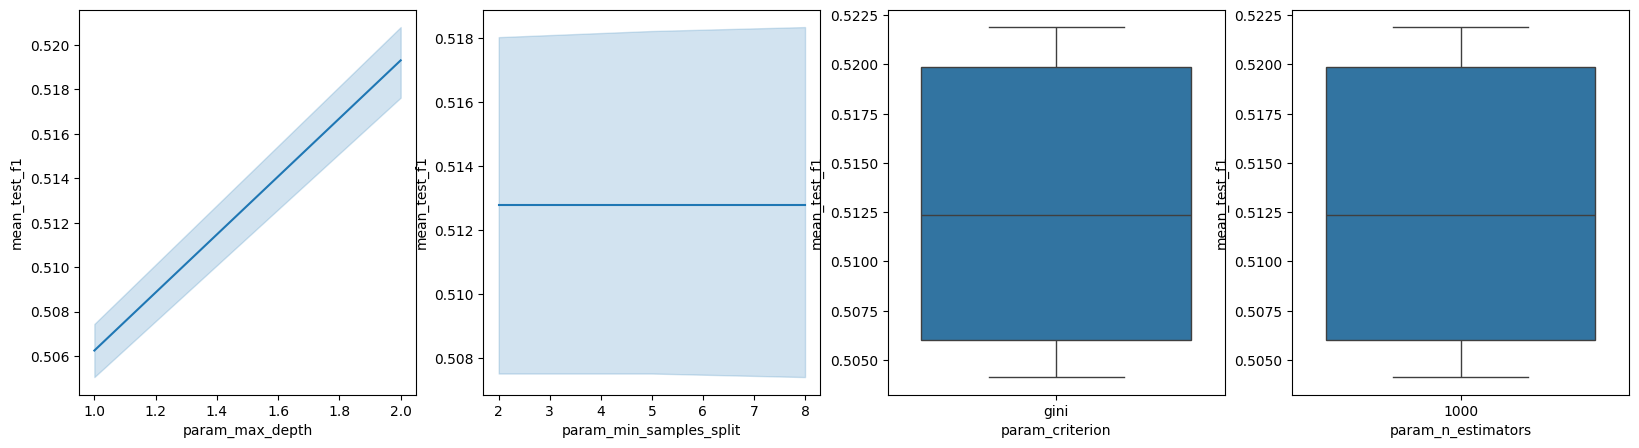

In [132]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sb.lineplot(data=rf_cv_results, x='param_max_depth', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=rf_cv_results, x='param_min_samples_split', y='mean_test_f1', ax=ax[1])
sb.boxplot(data=rf_cv_results, x='param_criterion', y='mean_test_f1', ax=ax[2])
sb.boxplot(data=rf_cv_results, x='param_n_estimators', y='mean_test_f1', ax=ax[3])

In [126]:
print(rf_estimators)

[RandomForestClassifier(max_depth=2, n_estimators=300, random_state=15), RandomForestClassifier(max_depth=2, n_estimators=300, random_state=15), RandomForestClassifier(max_depth=2, n_estimators=300, random_state=15)]


In [133]:
rf_scores_train.describe()

,accuracy,precision,recall,f1,roc_auc
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.720615,0.815889,0.571647,0.521255,0.854539
std,0.003286,0.001553,0.004094,0.002797,0.000596
min,0.716949,0.814490,0.566933,0.518152,0.853875
25%,0.719275,0.815054,0.570312,0.520093,0.854296
50%,0.721601,0.815619,0.573690,0.522033,0.854717
75%,0.722448,0.816589,0.574004,0.522807,0.854872
max,0.723296,0.817560,0.574319,0.523581,0.855026


In [134]:
rf_scores_test.describe()

,accuracy,precision,recall,f1,roc_auc
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.718581,0.814326,0.569740,0.519500,0.849596
std,0.004643,0.007365,0.003070,0.004387,0.002085
min,0.713220,0.806522,0.566320,0.514485,0.848053
25%,0.717194,0.810912,0.568483,0.517935,0.848410
50%,0.721167,0.815301,0.570646,0.521385,0.848767
75%,0.721261,0.818228,0.571451,0.522007,0.850367
max,0.721356,0.821156,0.572255,0.522629,0.851967


In [ ]:
gb_params = {
    "n_estimators": [75],
    "learning_rate": [0.125], #0.1, ,0.15
    'min_samples_split': [4,6,8], 
    'max_depth': [4,5,6], 
}

gb_estimators, gb_scores_train, gb_scores_test, gb_cv_results = train(df_features, df_targets,
    GradientBoostingClassifier(random_state=global_random_state),
    gb_params, outer_splits=3, inner_splits=3)

*
*
*


In [109]:
gb_scores_train.describe()

,accuracy,precision,recall,f1,roc_auc
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.909247,0.909604,0.871568,0.887415,0.978743
std,0.018511,0.020742,0.025756,0.023957,0.007359
min,0.894915,0.895764,0.851895,0.871015,0.972261
25%,0.898797,0.897681,0.856992,0.873668,0.974743
50%,0.902679,0.899598,0.862089,0.876322,0.977225
75%,0.916412,0.916525,0.881405,0.895615,0.981984
max,0.930146,0.933452,0.900720,0.914907,0.986743


In [111]:
gb_scores_test.describe()

,accuracy,precision,recall,f1,roc_auc
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.769670,0.717376,0.687246,0.696673,0.890938
std,0.017887,0.025700,0.017555,0.019329,0.008195
min,0.755254,0.697232,0.668118,0.676848,0.883181
25%,0.759661,0.702904,0.679558,0.687276,0.886652
50%,0.764068,0.708577,0.690998,0.697704,0.890123
75%,0.776878,0.727448,0.696810,0.706585,0.894817
max,0.789688,0.746320,0.702621,0.715465,0.899511


<Axes: xlabel='param_n_estimators', ylabel='mean_test_f1'>

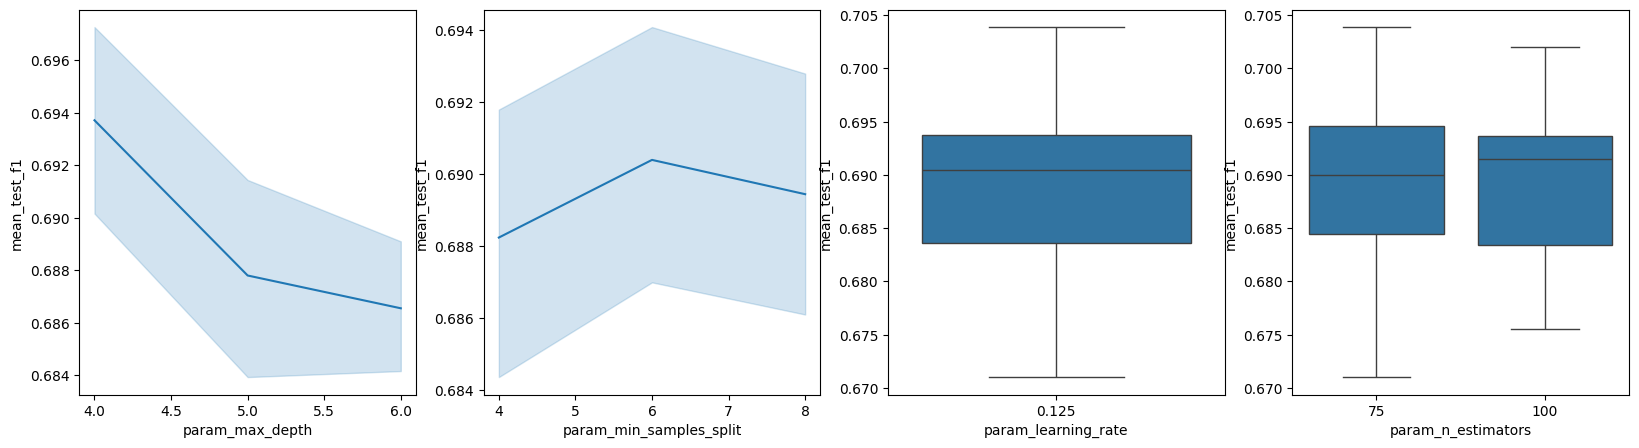

In [112]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sb.lineplot(data=gb_cv_results, x='param_max_depth', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=gb_cv_results, x='param_min_samples_split', y='mean_test_f1', ax=ax[1])
sb.boxplot(data=gb_cv_results, x='param_learning_rate', y='mean_test_f1', ax=ax[2])
sb.boxplot(data=gb_cv_results, x='param_n_estimators', y='mean_test_f1', ax=ax[3])

In [113]:
print(gb_estimators)

[GradientBoostingClassifier(learning_rate=0.125, max_depth=4,
                           min_samples_split=6, n_estimators=75,
                           random_state=15), GradientBoostingClassifier(learning_rate=0.125, max_depth=4,
                           min_samples_split=6, random_state=15), GradientBoostingClassifier(learning_rate=0.125, max_depth=4,
                           min_samples_split=6, n_estimators=75,
                           random_state=15)]


In [101]:
lr_params = {
    "solver": ["lbfgs", "newton-cg", "newton-cholesky", "sag", "saga"],
    "penalty": ["l2"],
    'C': [0.05, 0.1, 0.5, 1, 1.5],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
}

lr_estimators, lr_scores_train, lr_scores_test, lr_cv_results = train(df_features, df_targets,
    LogisticRegression(random_state=global_random_state),
    lr_params)

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

*


In [102]:
lr_scores_test.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.762434,0.703371,0.664935,0.672490,0.878842
std,0.012205,0.019818,0.013093,0.014739,0.005856
min,0.744633,0.676538,0.647256,0.654383,0.870457
25%,0.759322,0.693056,0.659494,0.663375,0.875090
50%,0.760452,0.705416,0.663436,0.671777,0.881533
75%,0.772624,0.713037,0.672873,0.680654,0.882869
max,0.775141,0.728806,0.681617,0.692259,0.884259


In [104]:
lr_scores_train.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.773847,0.719387,0.678933,0.687762,0.889280
std,0.005102,0.007764,0.006339,0.007132,0.003042
min,0.767731,0.712523,0.672458,0.681148,0.884064
25%,0.770621,0.714039,0.675290,0.683672,0.889562
50%,0.773100,0.715898,0.676762,0.684543,0.890368
75%,0.777338,0.723372,0.681517,0.690497,0.890444
max,0.780446,0.731105,0.688636,0.698949,0.891964


<Axes: xlabel='param_solver', ylabel='mean_test_f1'>

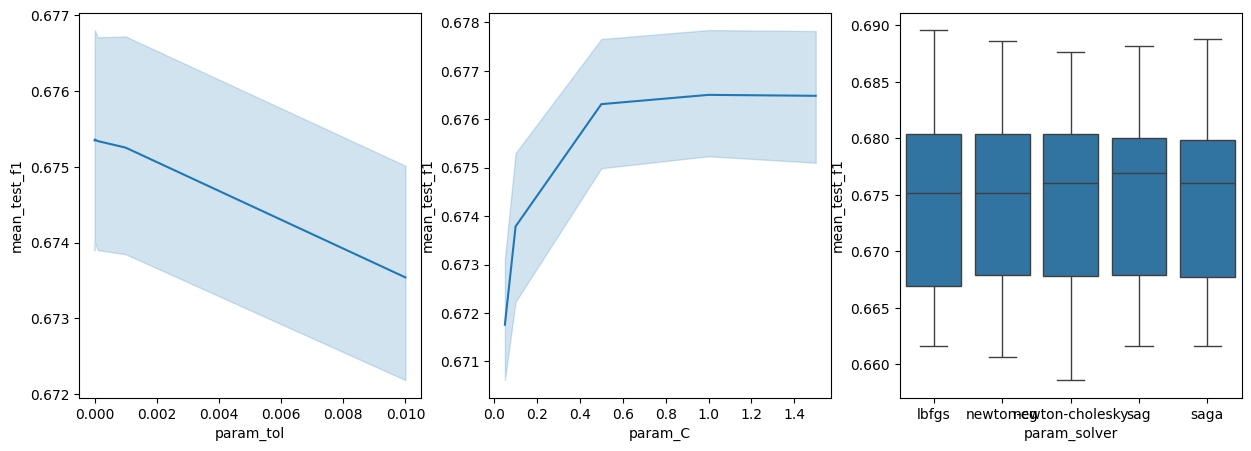

In [105]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sb.lineplot(data=lr_cv_results, x='param_tol', y='mean_test_f1', ax=ax[0])
sb.lineplot(data=lr_cv_results, x='param_C', y='mean_test_f1', ax=ax[1])
sb.boxplot(data=lr_cv_results, x='param_solver', y='mean_test_f1', ax=ax[2])


In [106]:
print(lr_estimators)

[LogisticRegression(C=1, random_state=15, tol=0.001), LogisticRegression(C=0.1, random_state=15, tol=0.001), LogisticRegression(C=0.05, random_state=15, tol=0.01), LogisticRegression(C=1, random_state=15, tol=0.001), LogisticRegression(C=1.5, random_state=15, solver='newton-cg')]
